# 使用pytorch来实现线性模型的过程

1.如何构造自己的神经网络-module
2.如何构造损失函数-loss
3.如何构建梯度下降优化器-sgd

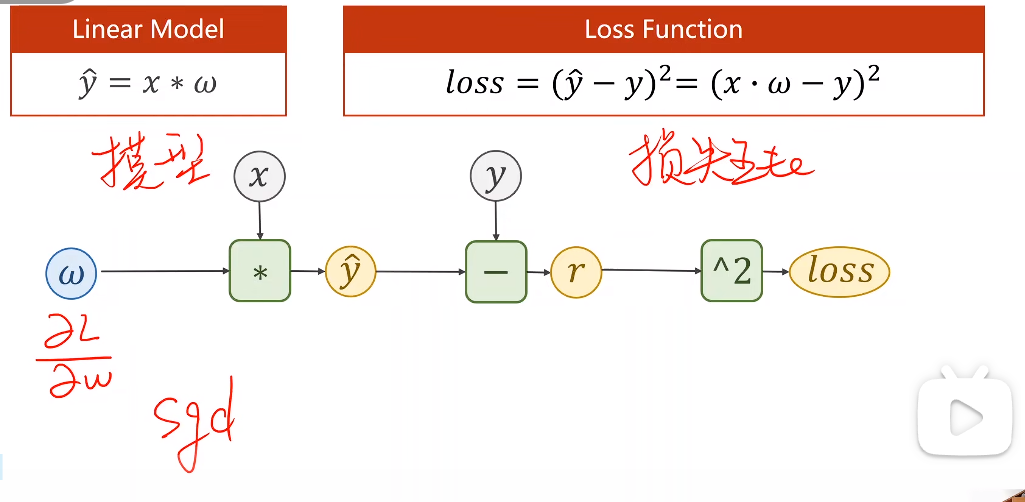

在前面已经用过的
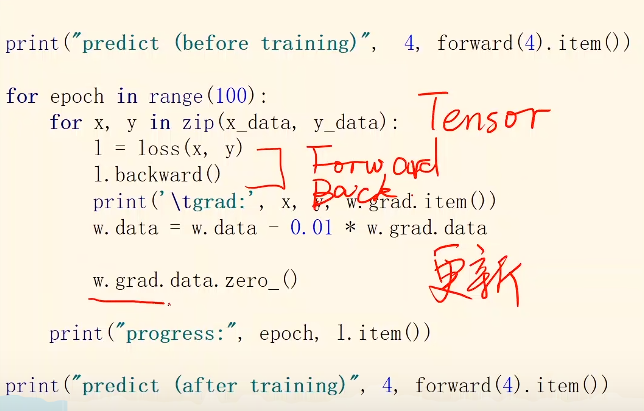

1.先构建数据集

2.设计模型nn.module--计算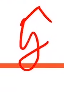

3.使用pytorch的接口来进行构建损失函数和优化函数（使用的其封装的功能）

4.训练周期===》主要是一个前馈（算损失） 后愦（算梯度） 更新（用梯度下降算法来更新权重）

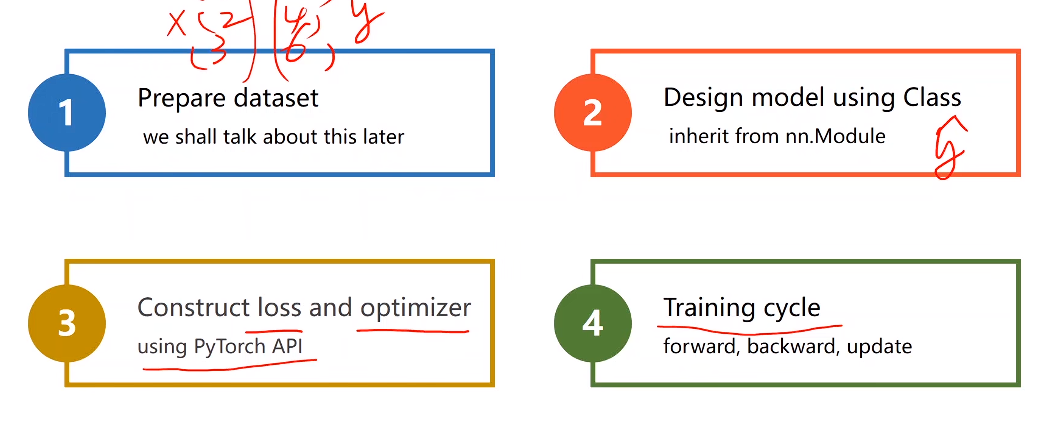

# 1.在pytorch中使用数据

模型若是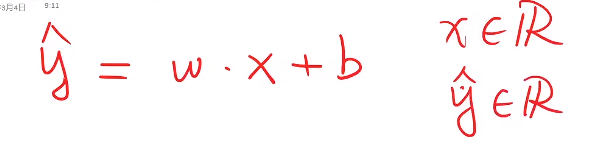

数据样本若有3个

计算过程为：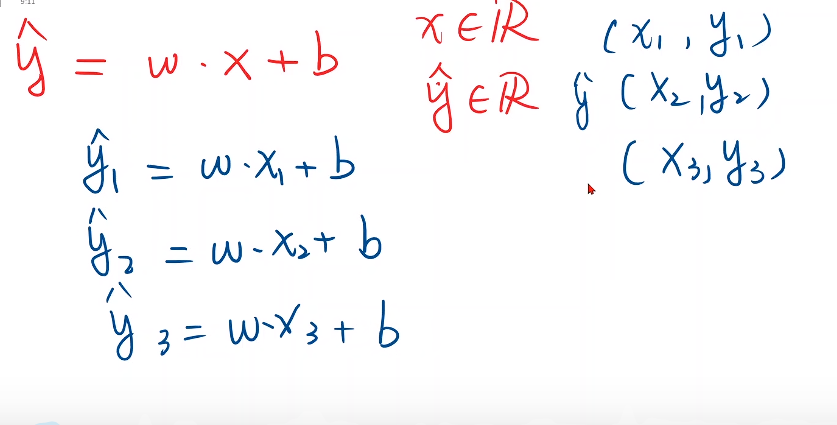

由于广播机制 w和b会自动进行扩充
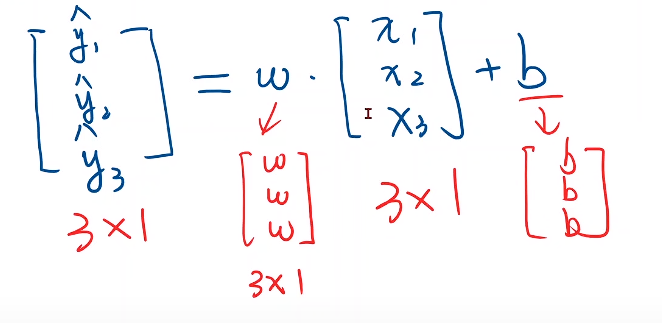

计算损失(y^-y)^2变为向量化情况

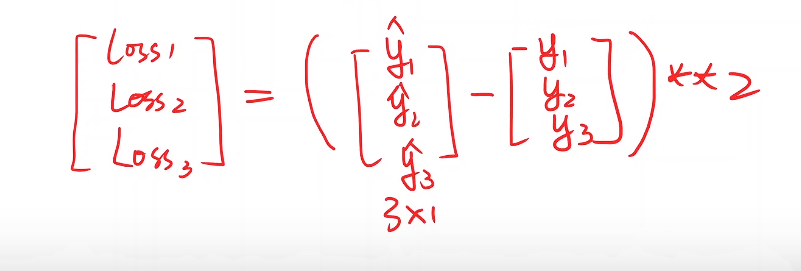
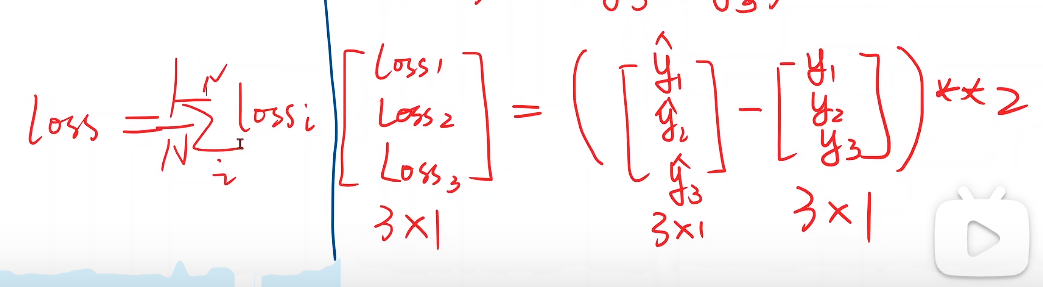
广播机制/自动扩充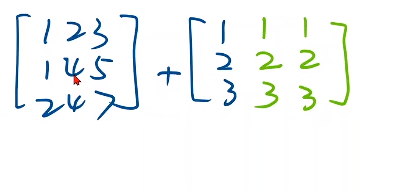

构造计算图
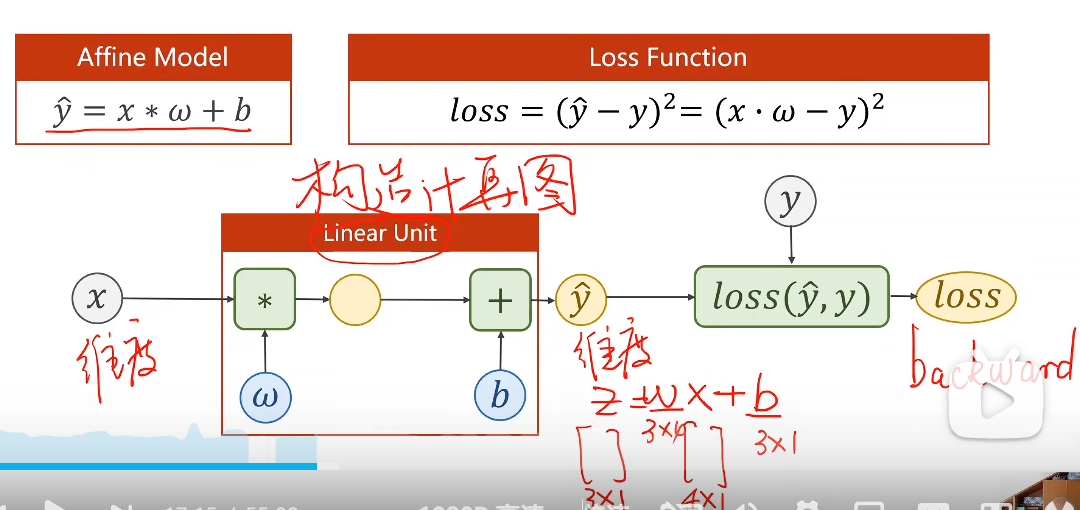



#torch.nn.Linear是pytorch里面的一个类
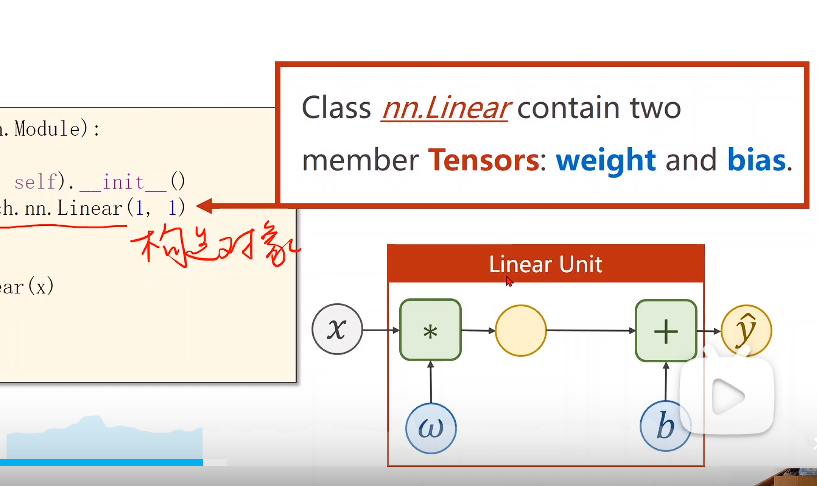
linear对象（有两个权重w和b  实现的就是一个y=Ax+b的线性模型）
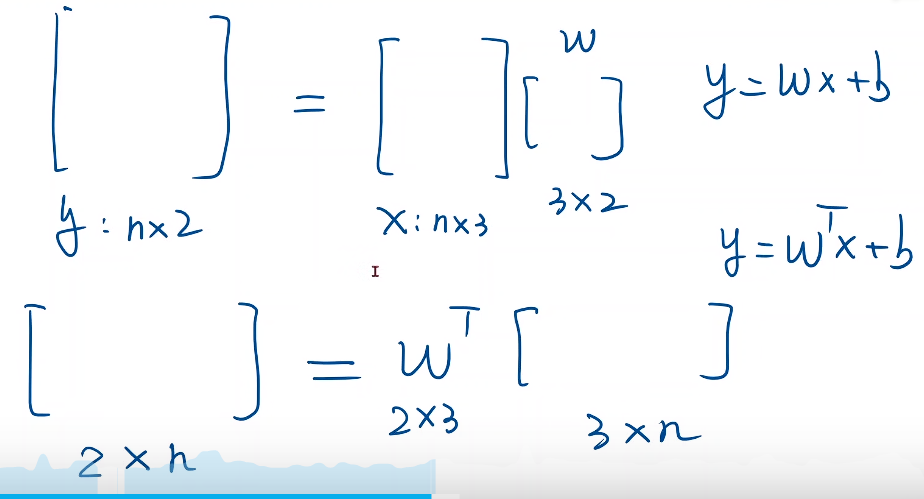
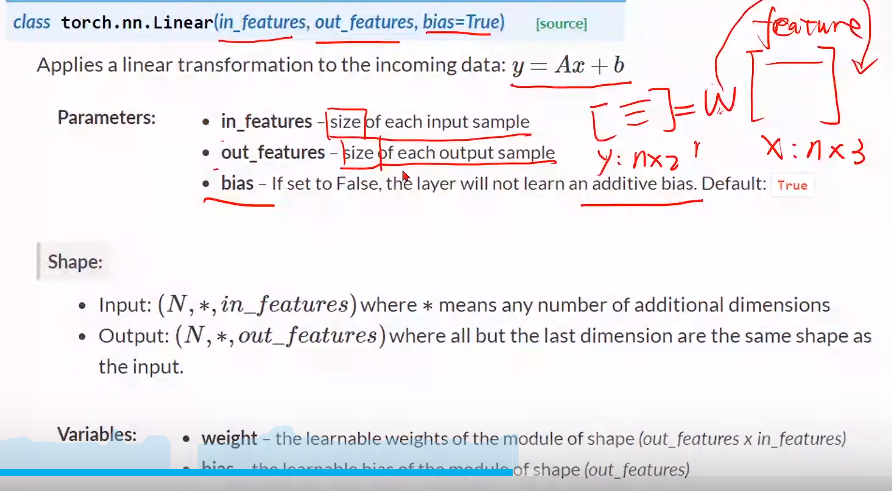

In [1]:
import torch
#用mini-batch来构建数据集 
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])

#怎么用pytorch来构建一个模型 将模型定义成一个类

class LinearModel(torch.nn.Module):#定义类都要继承至父类nn.module
    #最起码必须实现两个函数 一个初始化函数 一个前馈函数forward()
    #用module会自动根据构造实现后愦过程 不用刻意定义
    def __init__(self):#构造函数
        super(LinearModel,self).__init__()#不用管是什么直接写就行了
        self.linear = torch.nn.Linear(1,1,bias=True)
        #torch.nn.Linear是pytorch里面的一个类 第一个参数是输入样本是几维的 第二个参数是输出样本的几维的
    def forward(self,x):
        y_pred = self.linear(x)#实现一个可调用的对象
        return y_pred

model = LinearModel()
#该model是一个callable是可以传递参数进去 是可以直接被调用的
#model（x）是可以返回一个y_pred

In [2]:
#在定义的一个类中 调用该类并传递参数进去例子 实现一个可调用的对象
class Z:
    def __init__(self):
        pass
    def __call__(self,*args,**kwargs):
        print("ZWT"+str(args[0]),kwargs)
z = Z()
z("dsadas",a=4,b=9)

ZWTdsadas {'a': 4, 'b': 9}


1.求损失函数
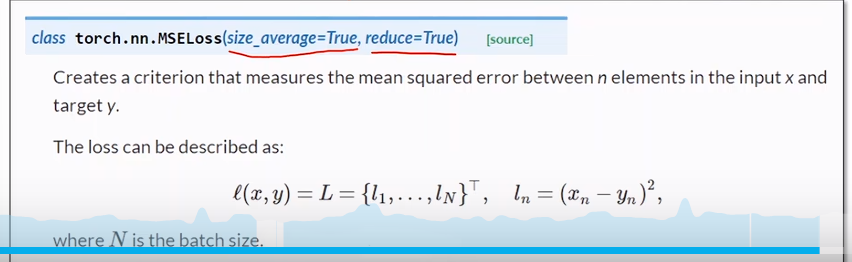
2.优化器

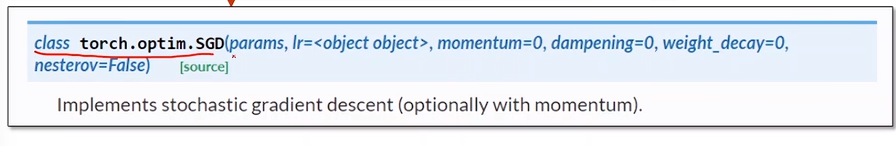
lr即学习率 不同的模型可以使用不同的学习率 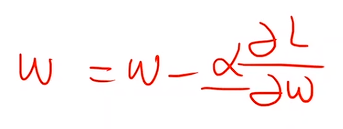

In [9]:
#构造损失函数
criterion = torch.nn.MSELoss(size_average=False)#是不是要求均值 需要的参数是（y^和y）就可以求出损失
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)#得到的一个优化器对象

D:\study\anaconda\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


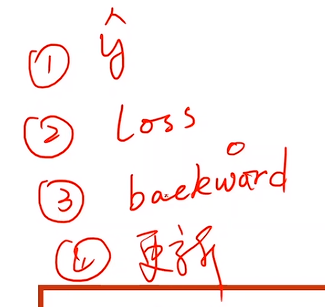

In [15]:
for epoch in range(1000):
    y_pred = model(x_data) #求y^
    loss = criterion(y_pred,y_data) #求损失
    print(epoch,loss.item()) #打印损失 loss是一个对象 会自动调用
    
    optimizer.zero_grad() #梯度归0
    loss.backward() #进行反向传播
    optimizer.step() #自动进行权重更新 

0 0.030282283201813698
1 0.02984705939888954
2 0.029418108984827995
3 0.028995312750339508
4 0.02857864275574684
5 0.028167927637696266
6 0.027763135731220245
7 0.02736406773328781
8 0.026970915496349335
9 0.02658318355679512
10 0.026201263070106506
11 0.02582472190260887
12 0.025453481823205948
13 0.025087695568799973
14 0.02472721040248871
15 0.024371761828660965
16 0.024021591991186142
17 0.023676373064517975
18 0.02333604171872139
19 0.023000679910182953
20 0.022670069709420204
21 0.022344280034303665
22 0.02202317863702774
23 0.02170669659972191
24 0.021394774317741394
25 0.02108721435070038
26 0.020784202963113785
27 0.020485470071434975
28 0.020191092044115067
29 0.019900910556316376
30 0.019614897668361664
31 0.01933293603360653
32 0.01905519887804985
33 0.01878131926059723
34 0.018511377274990082
35 0.018245289102196693
36 0.01798313856124878
37 0.017724666744470596
38 0.017469901591539383
39 0.017218874767422676
40 0.016971401870250702
41 0.016727551817893982
42 0.01648716069

472 3.264618862885982e-05
473 3.21761253871955e-05
474 3.1714058422949165e-05
475 3.12579250021372e-05
476 3.080800888710655e-05
477 3.036551242985297e-05
478 2.9929084121249616e-05
479 2.9498027288354933e-05
480 2.9074795747874305e-05
481 2.865960050257854e-05
482 2.8246777219465002e-05
483 2.784155003610067e-05
484 2.7440164558356628e-05
485 2.704502003325615e-05
486 2.6658146452973597e-05
487 2.6273160983691923e-05
488 2.5896009901771322e-05
489 2.5524523152853362e-05
490 2.515922096790746e-05
491 2.4797991500236094e-05
492 2.4438522814307362e-05
493 2.4087377823889256e-05
494 2.3743023120914586e-05
495 2.340143510082271e-05
496 2.306371425220277e-05
497 2.2733438527211547e-05
498 2.2404718038160354e-05
499 2.2083037038100883e-05
500 2.1766398276668042e-05
501 2.1452578948810697e-05
502 2.1146390281501226e-05
503 2.0841605874011293e-05
504 2.0540875993901864e-05
505 2.0247041902621277e-05
506 1.995688580791466e-05
507 1.9668304958031513e-05
508 1.9386432541068643e-05
509 1.910812352

956 2.9683405955438502e-08
957 2.9244120014482178e-08
958 2.8778686100849882e-08
959 2.8356055281619774e-08
960 2.7975431748927804e-08
961 2.7549333481147187e-08
962 2.7203043373447144e-08
963 2.683964339667e-08
964 2.6469479053048417e-08
965 2.597994352981914e-08
966 2.5718009055708535e-08
967 2.5290830762969563e-08
968 2.4885650873329723e-08
969 2.4602115900052013e-08
970 2.420239297862281e-08
971 2.3850873276387574e-08
972 2.3528684778284514e-08
973 2.318216729690903e-08
974 2.2864526272314833e-08
975 2.25230110117991e-08
976 2.220991746071377e-08
977 2.1873404421057785e-08
978 2.1556161300395615e-08
979 2.1317873688531108e-08
980 2.0920651877531782e-08
981 2.0677418888226384e-08
982 2.037751301031676e-08
983 2.0055097138538258e-08
984 1.9751723812078126e-08
985 1.952344064193312e-08
986 1.9224273728468688e-08
987 1.8910952803707914e-08
988 1.866379761850112e-08
989 1.837111085478682e-08
990 1.8088485376210883e-08
991 1.7909314919961616e-08
992 1.7622198811295675e-08
993 1.737612365

In [19]:
print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test = torch.Tensor([[4.0]]) #测试模型
y_test = model(x_test) 
print('y_pred = ', y_test.data.item())

w= 1.9999159574508667
b= 0.00019100606732536107
y_pred =  7.999855041503906


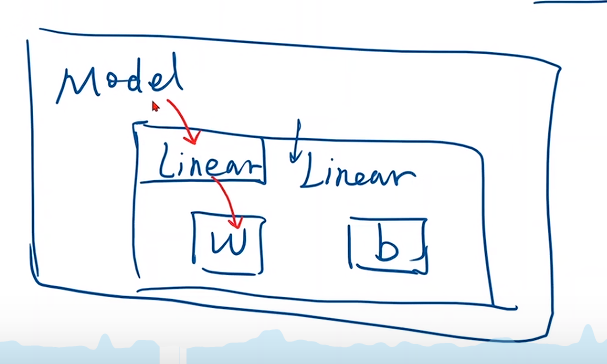